# Matplotlib 유형별 그래프

In [2]:
from matplotlib import pyplot as plt
from pandas import read_excel
import numpy as np

기본설정

In [3]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 글자 크기
plt.rcParams['font.size'] = 12
# 그래프 크기 설정(inch) inch 의 감이 없으니까 걍 inch [10,5]로 잡고 늘렸다가 줄였다가 하세욤
plt.rcParams['figure.figsize'] = (10,5)
# 유니코드에서 음수 부호 설정 (안하면 D로 표기됨)
plt.rcParams['axes.unicode_minus'] = False

(첫번째 파라미터가 카테고리, 두번째 파라미터가 데이터)를 뜻한다.
앞에 ?plt.메소드 하면 사용 방법이 나온다. 

2. Bar Chart
- x축은 범주형 데이터(카테고리)를 의미한다. 
- 막대그래프는 범주형 데이터(순서x)

1. 세로 막대 그래프
- 세로 막대 그래프인 경우 bar(xdata,ydata) 메서드를 사용

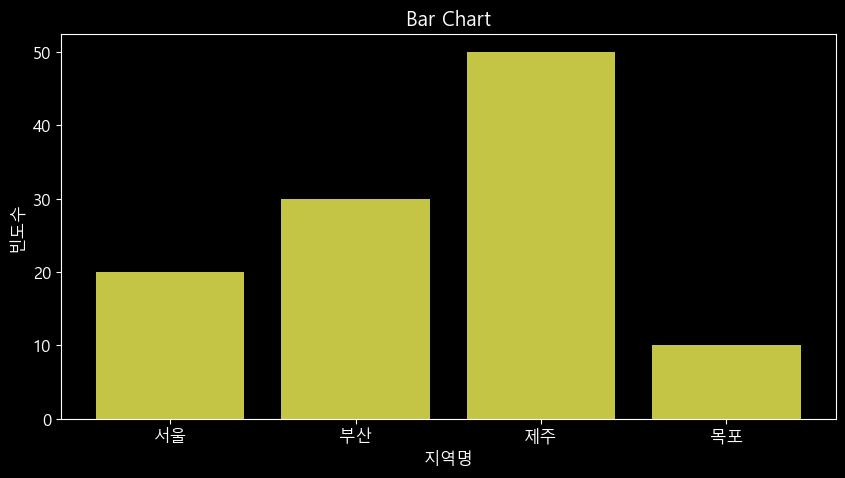

In [4]:
x = ['서울','부산','제주','목포']
y = [20,30,50,10]
plt.figure()
plt.title('Bar Chart')

# 각 막대의 색상을 단색으로 지정
plt.bar(x,y,color ='#c4c445')
plt.xlabel('지역명')
plt.ylabel('빈도수')

plt.show()
plt.close()

2. 가로 막대 그래프
가로 막대 그래프인 경우 bar(xdata,ydata) 메서드를 사용한다

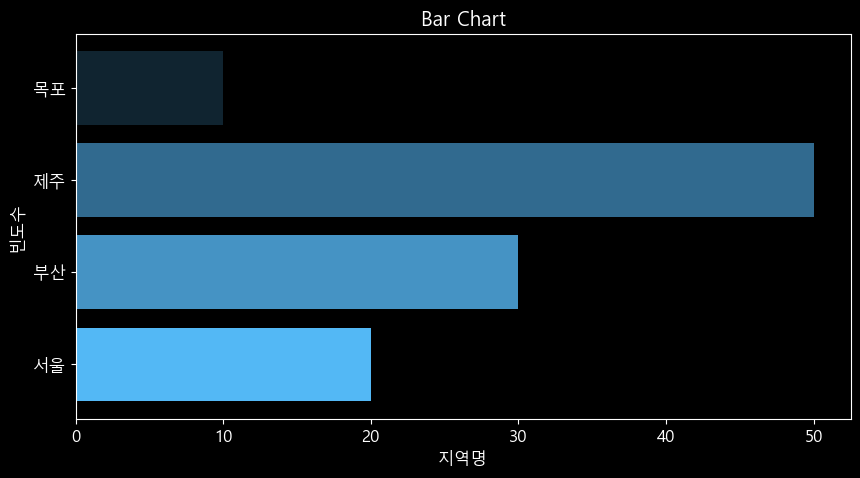

In [5]:
x = ['서울','부산','제주','목포']
y = [20,30,50,10]
plt.figure()
plt.title('Bar Chart')

# 각 막대의 색상을 단색으로 지정
plt.barh(x,y,color =['#53b8f5','#4593c4','#316a8f','#102430'])
plt.xlabel('지역명')
plt.ylabel('빈도수')

plt.show()
plt.close()

3. 다중 막대 그래프
예제 데이터 불러오기

In [6]:
df = read_excel("https://data.hossam.kr/grade.xlsx")
df

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,77,88,64
1,영희,2,여자,88,90,62,72
2,민철,1,남자,92,70,83,79
3,수현,3,여자,63,60,31,70
4,호영,4,남자,75,50,90,88


In [7]:
df['이름'] # Series타입으로 가져옴 

0    철수
1    영희
2    민철
3    수현
4    호영
Name: 이름, dtype: object

In [8]:
# x축에 표시할 텍스트
xlables = list(df['이름'])
xlables

['철수', '영희', '민철', '수현', '호영']

In [9]:
# x축 좌표
# 다중 막대 그래프의 경우 x축을 좌표값(숫자)를 원소로 갖는 numpy.array로 처리하고 나중에 index를 수정하는 것이 유리하다.
x = np.array(range(0,len(xlables)))
x

array([0, 1, 2, 3, 4])

In [10]:
# y축 데이터
y1 = list(df['국어'])
y2 = list(df['영어'])

다중 막대 그래프의 경우 x축을 좌표값(숫자)를 원소로 갖는 numpy.array로 처리하는 것이 유리하다. 
: 다중막대그래프부터는 무조건 좌표처리를 해야 한다. x축 좌표는 리스트 말고 numpy 배열로 해야 한다. 
왜용? width는 짝수로 줘야 계산이 편함 안 그러면 그래프끼리 겹쳐 
넘파이는 -2하면 리스트 내부에 있는걸 다 한번에 -2빼줘, 리스트는 for 반복문으로 빼야하는데.
그리고 '철수 영희' 이렇게 하면 빼기가 안되니까 좌표값을 숫자로 줘야 한다. 

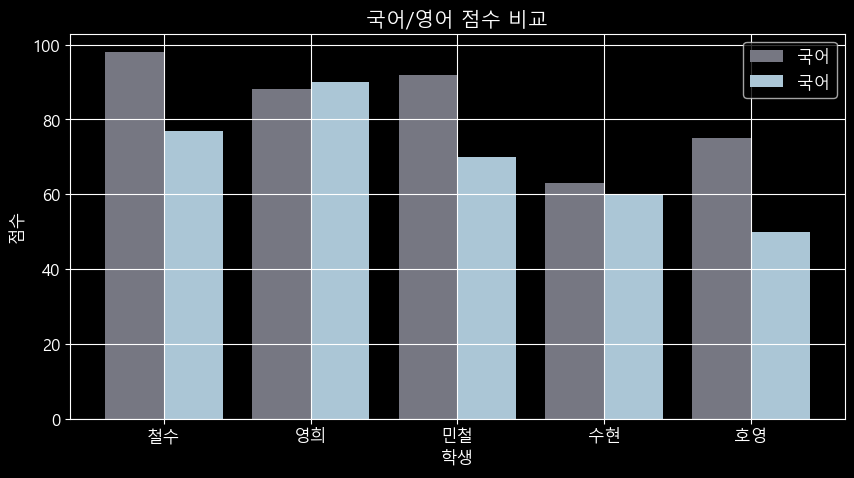

In [11]:
# 그래프 그리기
plt.figure()
plt.title('국어/영어 점수 비교')
# 각 막대의 색상을 단색으로 지정
plt.bar(x-0.2,y1,color='#767782',label='국어',width=0.4)
plt.bar(x+0.2,y2,color='#abc6d6',label='국어',width=0.4)

plt.xlabel('학생')
plt.ylabel('점수')
plt.grid()
plt.legend()
plt.xticks(x,xlables)
plt.show()
plt.close()

3. Pie Chart
- 카테고리별 값의 상대적인 비교
- 확대비율 : 피자조각처럼 나오는거 explode 파라미터로 사용, autopct는 각 섹션에 대한 데이터 표시 여부  %d는 정수 표현 %f 실수 표현 0.1f%% 

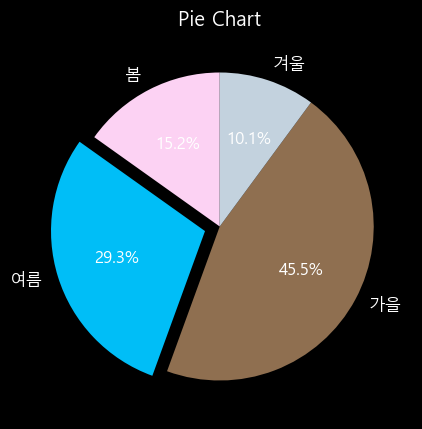

In [12]:
# 데이터
data = [15,29,45,10]
# 각 데이터별 레이블 
lables = ['봄','여름','가을','겨울']
# 각 데이터별 색상
colors = ['#fcd2f3','#00bef7','#8f6f50','#c3d2de']
# 각 데이터별 확대비율
explode = (0,0.1,0,0)

plt.figure()
plt.title('Pie Chart')
plt.pie(data,labels=lables,colors=colors,explode=explode,autopct="%0.1f%%",startangle=90,shadow=False)
plt.show()
plt.close()

4. 산점도 그래프
- 2차원 데이터 즉, 두개의 실수 데이터 집합의 상관관계를 살펴보려면 scatter 명령으로 스캐터 플롯을 그린다.
- 스캐터 플롯의 점 하나의 위치는 데이터 하나의 x,y값이다. 

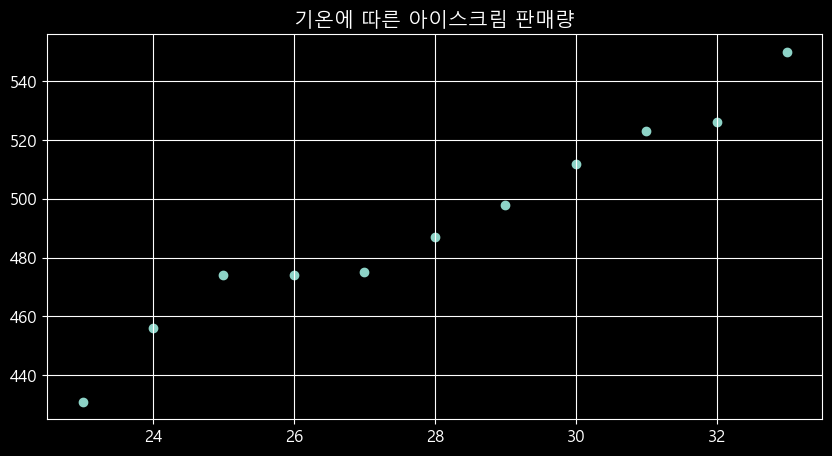

In [13]:
기온 =   [23,  24,  25,  26,  27,  28,  29,  30,  31,  32, 33]
판매량 = [431, 456, 474, 474, 475, 487, 498, 512, 523, 526, 550]

plt.figure()
plt.title("기온에 따른 아이스크림 판매량")
plt.scatter(기온, 판매량)
plt.grid()
plt.show()
plt.close()

# 만약 저장하고 싶다면 show()하기 전에 savefig('저장.png')를 사용해야 한다.